# Lista 1 - Regressão Linear

##### Imports

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, metrics
import numpy as np
import pandas as pd

## Load data

In [4]:
X, y = datasets.load_diabetes(return_X_y=True)

In [5]:
X.shape

(442, 10)

In [6]:
y.shape

(442,)

## Correlação entre cada feature (Xi) e o label (y) em Gráficos


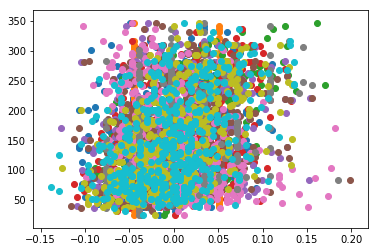

In [7]:
for i in range(X.shape[1]):
    plt.grid()
    plt.scatter(X[:, i], y)

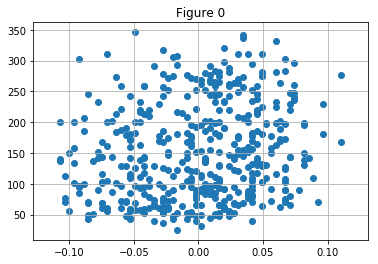

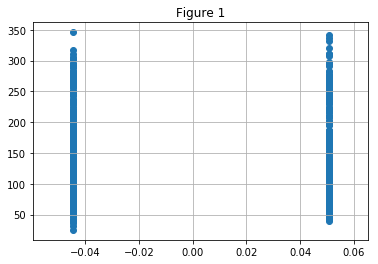

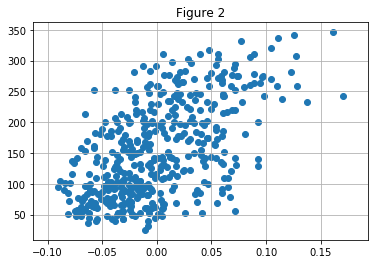

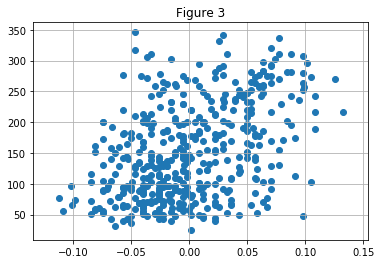

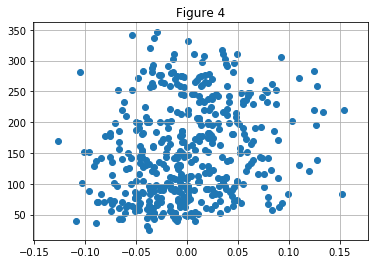

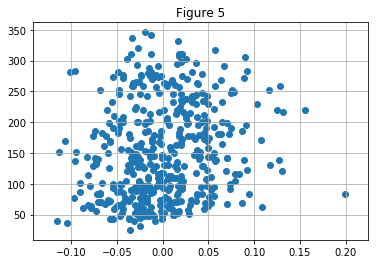

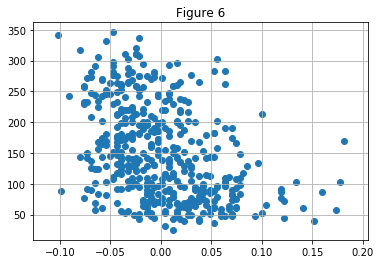

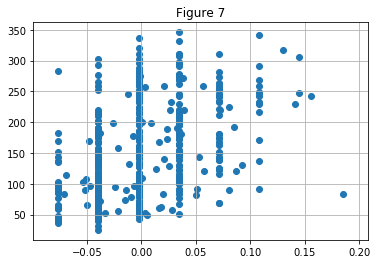

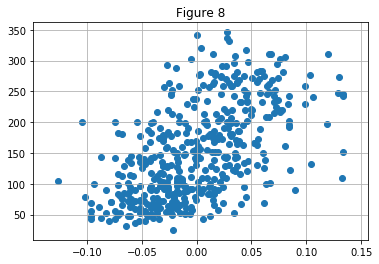

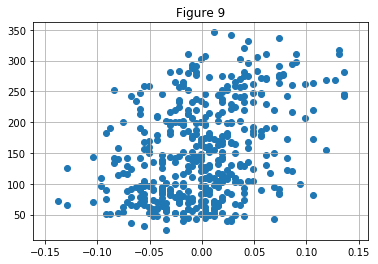

In [8]:
for i in range(X.shape[1]):
    plt.grid()
    plt.scatter(X[:, i], y)
    plt.title('Figure %d' % i)
    plt.show()


### Qual feature melhor se ajusta a uma função linear?

As features X2, X8. Por que elas tendem a representar uma variação constante de crescimento ou descrescimento em relação ao label.

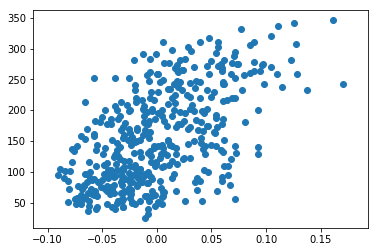

In [9]:
plt.scatter(X[:, 2], y)

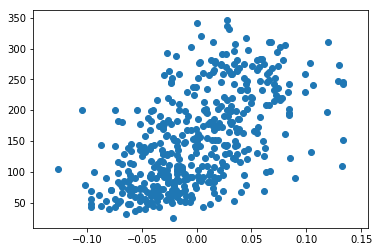

In [10]:
plt.scatter(X[:, 8], y)

### Qual feature pior se ajusta a uma função linear? 

A feature de X1. Por que os dados estão muito dispersos.

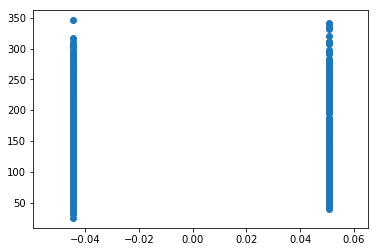

In [11]:
plt.scatter(X[:, 1], y)

## Correlação entre cada feature (Xi) e o label (y) em Números

In [12]:
for i in range(X.shape[1]):
    print ('Correlação ' + str(i))
    print(np.corrcoef(X[:, i], y)[0][1])
    print ('-----')

Correlação 0
0.187888750719
-----
Correlação 1
0.0430619984516
-----
Correlação 2
0.586450134475
-----
Correlação 3
0.441483848931
-----
Correlação 4
0.212022481015
-----
Correlação 5
0.174053586969
-----
Correlação 6
-0.394789250671
-----
Correlação 7
0.430452884745
-----
Correlação 8
0.565883425243
-----
Correlação 9
0.382483484249
-----


## Modelo Linear

In [13]:
model = linear_model.LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Score

In [15]:
model.score(X, y)

0.51774942541329338

### Coeficientes

#### B0

In [16]:
b0 = model.intercept_
b0

152.13348416289651

#### B1

In [17]:
b1 = model.coef_
b1

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

### Formula da função

$ \beta_1 = \frac{ \sum_{i=1}^{n} (x_i - mean(x)) \times (y_i - mean(y))}{\sum_{i=1}^{n} (x_i - mean(x))^2} $

In [2]:
"$ \beta_1 = \frac{ \sum_{i=1}^{n} (x_i - mean(x)) \times (y_i - mean(y))}{\sum_{i=1}^{n} (x_i - mean(x))^2} $"

'$ \x08eta_1 = \x0crac{ \\sum_{i=1}^{n} (x_i - mean(x)) \times (y_i - mean(y))}{\\sum_{i=1}^{n} (x_i - mean(x))^2} $'

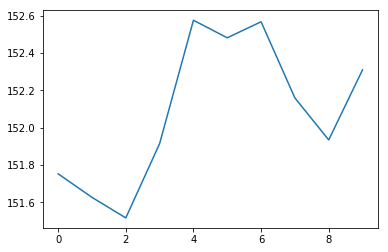

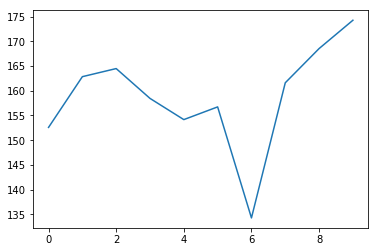

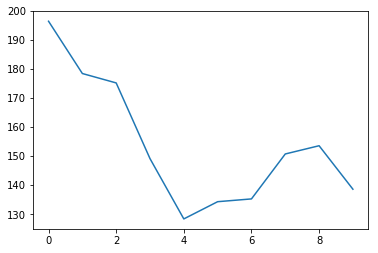

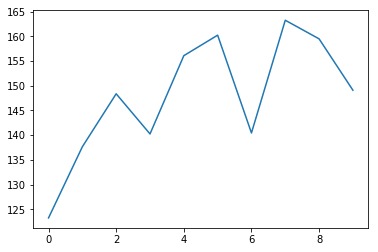

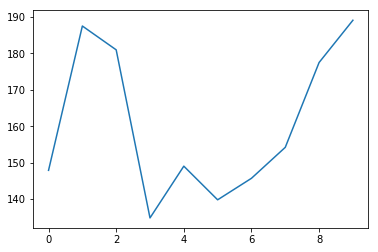

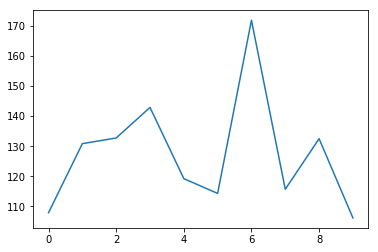

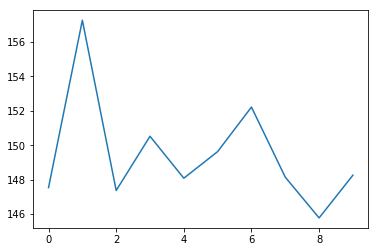

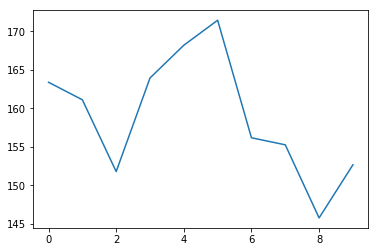

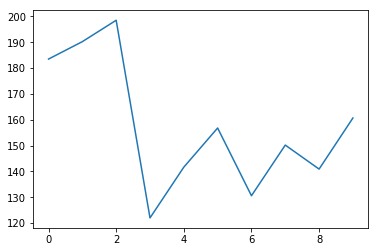

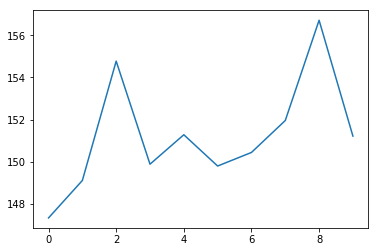

In [24]:
for i in range(X.shape[1]):
    f = b1[i] * X[i] + b0
    plt.plot(f)
    plt.show()

## Predição

In [18]:
y_pred = model.predict(X)
for i in range(10):
    print (y_pred[i])

206.117069787
68.07234761
176.88406035
166.91796559
128.459842409
106.349089715
73.8941794736
118.853786687
158.810330758
213.584088929


### Gráfico do modelo predito

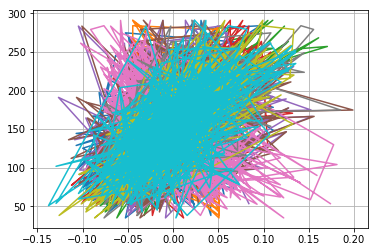

In [19]:
plt.grid()
plt.plot(X, y_pred)
plt.show()

## MSE

#### Scikit

In [20]:
mse = metrics.mean_squared_error(y, y_pred=y_pred)
print(mse)

2859.69039877


#### Manual

In [21]:
mse_p = sum((y - y_pred) ** 2) / len(y)
print(mse_p)

2859.69039877


## Novo Model para melhor feature

In [25]:
mb = linear_model.LinearRegression()

In [26]:
XB = pd.DataFrame(X[:, 2])
XB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
0    442 non-null float64
dtypes: float64(1)
memory usage: 3.5 KB


In [27]:
mb.fit(XB, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
yb_pred = mb.predict(XB)

### - Coeficientes da função 

In [29]:
print (mb.coef_)
print (mb.intercept_)

[ 949.43526038]
152.133484163


### - Coeficientes da função (manual)

In [30]:
y_ = [ [i] for i in y ]
y_[0]

[151.0]

In [31]:
np.sum((XB - np.mean(XB)) ** 2)

0    1.0
dtype: float64

#### B1

In [32]:
b1 = np.sum((XB - np.mean(XB)) * (y_ - np.mean(y_))) / np.sum((XB - np.mean(XB)) ** 2) 
b1

0    949.43526
dtype: float64

#### B0

In [33]:
b0 = np.mean(y_) - b1 * np.mean(XB)
b0

0    152.133484
dtype: float64

### - Grafico

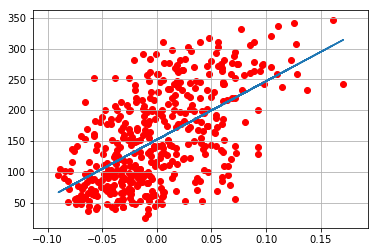

In [34]:
plt.grid()
plt.scatter(XB, y, color='red')
plt.plot(XB, yb_pred)
plt.show()

### - MSE

In [35]:
mse = metrics.mean_squared_error(y, y_pred=yb_pred)
print(mse)

3890.45658546


## Novo Model para pior feature

In [36]:
mw = linear_model.LinearRegression()

In [37]:
XW = pd.DataFrame(X[:, 1])
XW.head()

,0
0,0.050680
1,-0.044642
2,0.050680
3,-0.044642
4,-0.044642


In [38]:
mw.fit(XW, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
yw_pred = mw.predict(XW)

### - Coeficientes da função

In [40]:
print (mb.coef_)
print (mb.intercept_)

[ 949.43526038]
152.133484163


### - Grafico

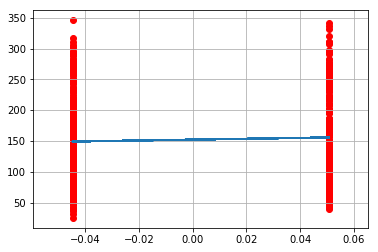

In [41]:
plt.grid()
plt.scatter(XW, y, color='red')
plt.plot(XW, yw_pred)
plt.show()

### - MSE

In [42]:
mse = metrics.mean_squared_error(y, y_pred=yw_pred)
print(mse)

5918.88889959
